Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [ ]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [ ]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

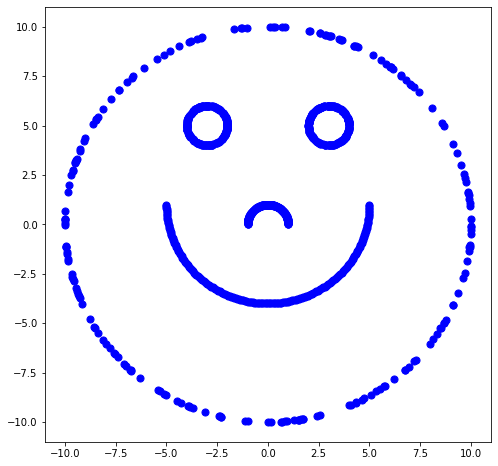

In [ ]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

# Q1 a

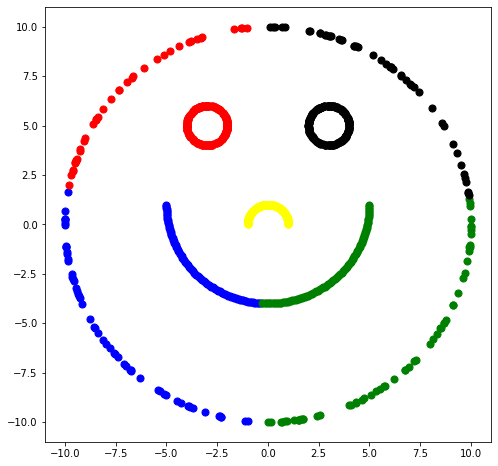

In [ ]:
#initilization for k-means
means =np.array([[-10,1], [-5.5,7.5],[7,2],[0,0],[7,7]])

flag = 1
while flag != 5:
    flag = 0
    temp = [[],[],[],[],[]]
    dist = np.array([])
    for i in X:
        dist = np.array([])
        #calculating the distance from each clusters
        for j in means:
            dist = np.concatenate([dist,[lin.norm([j-i])]])
        sel = np.argmin(dist)
        temp[sel].append(i)
    new_mean = np.array([])
    #convergence condition
    for i in range(0,len(means)):
        x = np.array(np.mean(temp[i],axis=0))
        new_mean = np.concatenate((new_mean,x),axis=0)
        if np.all((x-means[i])<0.000001):
            flag = flag+1
    means = new_mean.reshape(5,2)


#plotting the clusters
fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

# Q1 b)

In [ ]:
def kmeansp(X,counts):
    means = np.array([])
    Y = X
    #selecting random datapoint 
    sel = np.random.randint(0,len(Y))
    Y = np.delete(Y,sel,axis=0)
    means = np.append([means],[X[sel]],axis=1)
    count = 1
    #calcualting for reamaining cluster centroid
    while count<counts:
        
        points_dist = []
        for j in Y:
            min = -1    
            #calculating the distance from cluster points
            for i in means:
                dist = lin.norm([j-i])
                if min==-1 or dist < min:
                    min = dist
            points_dist.append(min**2)
        sum_a = sum(points_dist)
        prob = np.array([])
        
        #calculating the probability for each point
        for i in range(0,len(points_dist)):
            prob = np.append(prob,(points_dist[i]/sum_a))
            points_dist[i] = i
        
        #selecting the random point with probability of distance^2 
        t = np.random.choice(points_dist,1,p=prob)
        means = np.vstack((means,Y[t]))
        Y = np.delete(Y,t,axis=0)
        count = count + 1

    while True:
        flag = 0
        temp = [[] for i in range(counts)]
        dist = np.array([])
        for i in X:
            dist = np.array([])
            #calculating distance from all cluster centroid and selecting the minimum
            dist = lin.norm(means-i,axis=1)
            sel = np.argmin(dist)
            temp[sel].append(i)
        for i in range(0,len(means)):
            x = np.array(np.mean(temp[i],axis=0))
            #convergence condition
            if np.all((x-means[i])<0.000001):
                flag = flag+1
            means[i] = x
        if flag == counts:
            break

    return temp,means

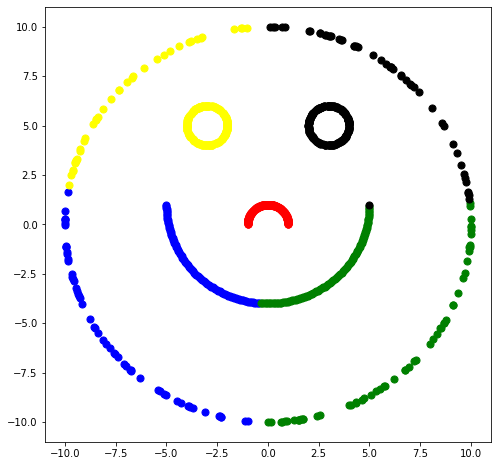

In [ ]:
#kmeans ++  funtion return cluster mean and clusterpoints
temp, cluster = kmeansp(X,5)

#plotting the dataset
fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

# Q 1 c)

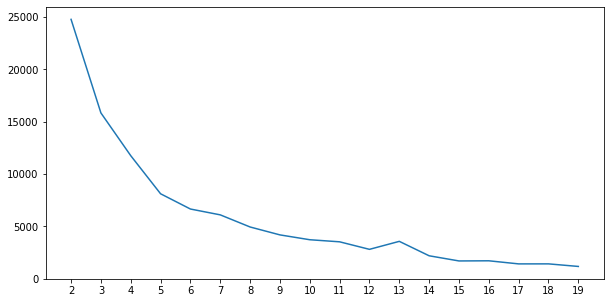

In [ ]:
#elbow method for finding the  optimal value of k
elbow = []
for i in range(2,20):
    cluster, centers = kmeansp(X,i)
    sum_sq = 0
    for j in range(len(centers)):
        centroid = np.mean(cluster[j],axis=0)
        for k in cluster[j]:
            sum_sq=sum_sq + (lin.norm([centroid-k]))**2
    elbow.append(sum_sq)

plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,20)],elbow)
plt.xticks([i for i in range(2,20)])
print()

For finding the optimial value of k elbow method is used. Generally it obseverd that optimal value of k ranges from 6 to 8



# Q1 D)

In [ ]:
#gaussian kernel distance
def kernel(x,y,sig):
    dis = lin.norm(x-y)**2/(2*(sig**2))
    res = np.exp(-dis)
    return res

For number of cluster = 5

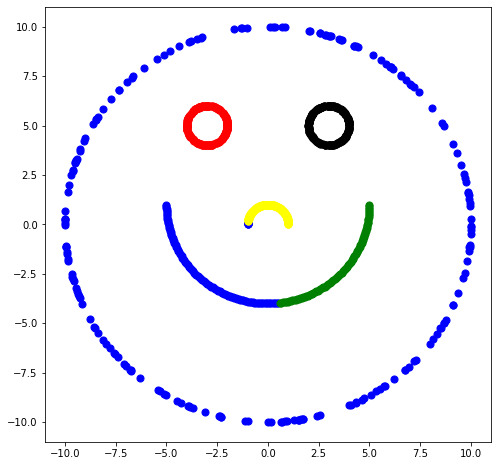

In [ ]:
#initilzaing the clusters means
means =np.array([[-10,1], [-5.5,7.5],[7,2],[0,0],[7,7]])
flag = 1
new_temp = []

while flag != 5:
    flag = 0
    temp = [[],[],[],[],[]]
    dist = np.array([])
    for i in X:
        dist = np.array([])
        
        #caculating the gaussian distance
        for j in means:
            dist = np.concatenate([dist,[kernel(i,j,0.1)]])
        sel = np.argmax(dist)
        temp[sel].append(i)
    new_mean = np.array([])
    for i in range(0,len(means)):
        x = np.array(np.mean(temp[i],axis=0))
        
        #convergence condition no member changes the the cluster 
        if len(new_temp)!=0:
            if np.array_equiv(temp[i],new_temp[i]):
                flag = flag+1
        means[i] = x
    #allocates the new means
    new_temp = temp[:]


#ploting the clsuter
fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

For number of cluster = 4

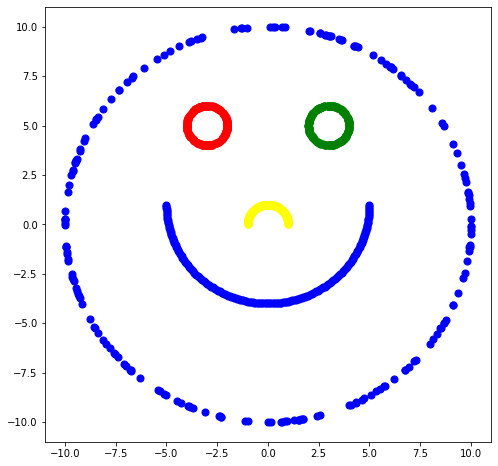

In [ ]:
#initilzaing the clusters means
means =np.array([[-10,-1],[-5.5,7.5],[5,1],[0,0]])
flag = 1
new_temp = []

while flag != 4:
    flag = 0
    temp = [[],[],[],[],[]]
    dist = np.array([])
    for i in X:
        dist = np.array([])
        
        #caculating the gaussian distance
        for j in means:
            dist = np.concatenate([dist,[kernel(i,j,0.1)]])
        sel = np.argmax(dist)
        temp[sel].append(i)
    new_mean = np.array([])
    for i in range(0,len(means)):
        x = np.array(np.mean(temp[i],axis=0))
        
        #convergence condition no member changes the the cluster 
        if len(new_temp)!=0:
            if np.array_equiv(temp[i],new_temp[i]):
                flag = flag+1
        means[i] = x
    #allocates the new means
    new_temp = temp[:]


#ploting the clsuter
fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

# Q2 a)

$\pi_k$ are known and covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$ <br><br>
$\text{GMM Distribution: } \\
p(\mathbf{x})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)\ \\
\text{where } \pi \text{ is mixture weights}$<br><br>
$
\text{Let } z \text{ be a latent variable }$ <br>
$z \sim \text { Categorical }(\pi) \quad \text { (where } \pi_{k} \geq 0, \quad \sum_{k} \pi_{k}=1 \text { ) }
$<br><br>
$\text{Let }\theta \text{ be set of parameters }\pi, \mu, \Sigma$ <br><br>
$\text{Likelihood is } \\
\begin{aligned}
L(\theta \mid \mathbf{X})&= p(\mathbf{X} \mid \theta) \\ \\
&=\prod_{i} p\left(x_{i} \mid \theta\right) \\ \\
&=\prod_{i}\left(\sum_{k = 1}^{K} \pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)
\end{aligned}
$<br><br>

$\text{Log Likelihood of Gausssian mixture is }$ <br>
$
\begin{aligned}
\ell(\mathbf{X} \mid \theta)&=\ln L(\mathbf{X} \mid \theta)\\ \\ &=\sum_{i} \log \left(\sum_{k=1}^{K} \pi_{k} N\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)
\end{aligned}
$<br><br>
$\text{Jensen's Inequality is } \\
\log \left(\sum_{k=1}^{K} \alpha_{k} x_{k}\right) \geqslant \sum_{k=1}^{K} \alpha_{k} \log \left(x_{k}\right) \\
\text{where } \alpha_{k} \text{ is weight of point } x_k$ <br><br>
$\text{The above inequality is used to define the lower bound on log likelihood which is dependent on}\theta \text{ and }E[z_n]$ <br><br>
$$
\begin{aligned}
\log \left(p\left(x_{i} \mid \theta\right)\right) &=\log \left(\sum_{k=1}^{K} p\left(x_{i} \mid z_{i}=k, \theta\right) p\left(z_{i}=k \mid \theta\right)\right) \\ \\
&=\log \left(\sum_{k=1}^{K} \frac{E[z_{ik}]}{E[z_{ik}]} p\left(x_{i}, z_{i}=k \mid \theta\right)\right) \\ \\
&=\log \left(\sum_{k=1}^{K} E[z_{ik}] \frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right)
\end{aligned}
$$<br><br>
$\text{We know that by Jensen's Inequality} $ <br>
$$
\begin{aligned}
&=\log \left(\sum_{k=1}^{K} E[z_{ik}] \frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right) \geqslant \sum_{k=1}^{K} E[z_{ik}] \log \left(\frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right) \\
&=\mathcal{L_{i}}(\theta, E[z_i])
\end{aligned}
$$<br><br>
$\large{\text{Derivation for Expectation Step}}$
<br><br>
$\text{Conditional Probability using Bayes Rule of  }z \text{ given } x$ <br><br>
$$
\begin{aligned}
E[z_{ik}]=p(z=k \mid \mathbf{x}) &=\frac{p(z=k) p(\mathbf{x} \mid z=k)}{p(\mathbf{x})} \\ \\
&=\frac{p(z=k) p(\mathbf{x} \mid z=k)}{\sum_{k=1}^{K} p(z=k) p(\mathbf{x} \mid z=k)} \\ \\
&=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)}
\end{aligned}
$$
<br><br>
$\large{\text{Derivation for maximization step}}$
<br><br>

$\text{We fix } E[z_i] \text{ and maximize the lower bound}$ <br><br>
$$
\begin{aligned}
\mathcal{L}(\theta, E[z_i])&=\sum_{i} \sum_{k=1}^{K} E[z_{ik}]\log \left(\frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right) \\ \\
&=\sum_{i} \sum_{k=1}^{K} E[z_{ik}] \log \left(p\left(x_{i}, z_{i}=k \mid \theta\right)\right)-\sum_{i} \sum_{k=1}^{K} E[z_{ik}] \log \left(E[z_{ik}]\right)
\end{aligned}
$$<br><br>
$\text{Second term in equation is not dependent on } \theta
$ <br><br>
$$\large{
\mathcal{L}(\theta, E[z_i])=\mathbb{E}_{E[z_i]} \log P(X, Z \mid \theta)}
$$<br><br>

$\text{To maximize likelihood we have take partial derivative w.r.t to } \theta$ <br><br>

$$
\begin{array}{r}
\max _{\theta} \mathcal{L}(\theta,E[z_{ik}]) \Leftrightarrow \nabla_{\theta} \mathcal{L}(\theta, E[z_{ik}])=  0 \\ \\
\Leftrightarrow\left\{\begin{array}{l}
\frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \Sigma_{k}}= 0 \\ \\
\frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0
\end{array}\right.
\end{array}
$$<br><br>


$\text{For Mean  } \mu_k$ <br><br>

$$\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0 \\ \\ 
& \frac{\partial}{\partial \mu_{k}}\left(\sum_i \sum_{k=1}^{K} E[z_{ik}] \log \left(\pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}] \log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right]\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}] \log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}}\right)+\sum_{i} E[z_{ik}] \log \left(\exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sum_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}]\left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sum_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0
\end{align}
$$<br><br>

$\text{We know that} \\
\frac{\partial}{\partial s}(\mathbf{x}-s)^{T} \mathbf{W}(\mathbf{x}-s)=-2 \mathbf{W}(\mathbf{x}-s)
$<br>

$$
\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0 \\ \\
& \sum_{i} E[z_{ik}]\left(-\frac{1}{2}\left(-2 \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0 \\ \\ 
& \sum_{i} E[z_{ik}] \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)=0 \\ \\
& \sum_{i} E[z_{ik}] \Sigma_{k}^{-1} x_{i}-\sum_{i} E[z_{ik}] \Sigma_{k}^{-1} \mu_{k}=0 \\ \\ 
& \mu_{k}= \frac{ \sum_{i} E[z_{ik}] \Sigma_{k}^{-1} x_{i}} {\sum_{i} E[z_{ik}] \Sigma_{k}^{-1}} \\ \\
& \mu_{k}= \frac {\sum_{i} E[z_{ik}] x_{i} }{\sum_i E[z_{ik}]}
\end{align}
$$<br><br>

$\text{For covarince  } \Sigma_k$ <br><br>
$$
\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \Sigma_{k}}=0 \\ \\ 
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_i \sum_{k=1}^{K} E[z_{ik}] \log \left(\pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\log \left(N\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0  \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\left(\log \left(\frac{1}{(2 \pi)^{(N / 2)}}\right)+\frac{1}{2} \log \left(\frac{1}{\left|\sum_{k}\right|}\right)+\log \left(\exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}] \left(\frac{1}{2} \log \left(\frac{1}{\left|\sum_{k}\right|}\right)-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0
\end{align}
$$<br><br>


$\text{For sperical covariance we know that}$ <br><br>

$$
\begin{aligned}
\Sigma_{k}^{-1} &= \frac{1}{\sigma_k^2} I \\ \\
\mid \Sigma_{k}^{-1} \mid &= \sigma_{k}^{-2D} \quad \text{Here D is the dimension of matrix}\\ \\
\end{aligned}
$$<br><br>

$$\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \sigma_{k}}=0 \\  
& \frac{\partial}{\partial \sigma_{k}}\left(\sum_{i} E[z_{ik}] \left(-D \log \left(\sigma_{k}\right)-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sigma_{k}^{-2}\left(x_{i}-\mu_{k}\right)\right)\right)=0 \\ 
& \sum_{i} E[z_{ik}] \left(- D +\frac {\left(x_{i}-\mu_{k}\right)^{T} \left(x_{i}-\mu_{k}\right)} {\sigma_k^2}\right) = 0 \\ \\
& D \sum_{i} E[z_{ik}] = \sum_{i} E[z_{ik}] \left(\frac {\left(x_{i}-\mu_{k}\right)^{T} \left(x_{i}-\mu_{k}\right)} {\sigma_k^2}\right) \\ \\
& {\sigma_k^2} = \frac {\sum_{i} E[z_{ik}] \quad {\mid \mid x_i - \mu_k \mid \mid}^2 } {D \sum_{i} E[z_{ik}]} \\ \\
\end{align}
$$<br><br>

$\text{Finally the new parameters are updated}$
$$\mu_{k}= \frac {\sum_{i} E[z_{ik}] x_{i} }{\sum_i E[z_{ik}]} \\
{\sigma_k^2} = \frac {\sum_{i} E[z_{ik}]{\mid \mid x_i - \mu_k \mid \mid}^2 } {D \sum_{i} E[z_{ik}]} \\
\Sigma_k = \sigma_k^2 I$$<br><br>




(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

# Q2 b)

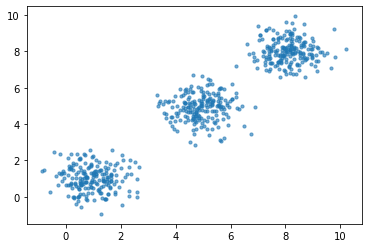

In [ ]:
#creating the syntheic dataset
from sklearn.datasets import make_blobs
x , z,y =make_blobs(n_samples=600, centers=[[1,1],[5,5],[8,8]], cluster_std=0.7 ,n_features=2,random_state=0,return_centers=True)
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)

Dataset is created with cluster centroid as (1,1), (5,5), (8,8) with std= 0.5

In [ ]:
#density funtion for multivariate 
def density(x, d, mean, covariance):
    x_m = x - mean
    res = (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))
    return res    


In [ ]:
#intilization for mean, and sigma 
mean = np.array([[2.,2.],[6.,6.],[10.,10.]])
id = np.array([[1.,0.],[0.,1.]])
sigma = np.array([1.,1.,1.])

while True:
    #covariance matrix
    cov1 = sigma[0]*id
    cov2 = sigma[1]*id
    cov3 = sigma[2]*id

    a = []
    new_mean = np.array([[0.,0.],[0.,0.],[0.,0.]])
    new_sigma = np.array([0.,0.,0.])
    #expectation step
    for i in x:
        weight1 = (1/3)*density(i,2,mean[0],cov1)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        weight2 = (1/3)*density(i,2,mean[1],cov2)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        weight3 = (1/3)*density(i,2,mean[2],cov3)/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        a.append([[weight1],[weight2],[weight3]])

    a = np.array(a)

    #maximization step
    for i in range(3):
        new_mean[i] = np.sum(x*a[:,i],axis=0)/np.sum(a[:,i])
        new_sigma[i] = np.sum(lin.norm(x - mean[i],axis=1).reshape(len(x),1)*a[:,i])/((np.sum(a[:,i]))*2)

    #convergence condition
    if np.all(new_mean-mean<0.00001) and np.all(sigma - new_sigma < 0.00001):
        mean = new_mean[:]
        sigma = new_sigma[:]
        break
    
    #assignmint the new means
    mean = new_mean[:]
    sigma = new_sigma[:]

In [ ]:
print('centroid of cluster 1 - ', mean[0],'std -' ,np.sqrt(sigma[0]))
print('centroid of cluster 2 - ', mean[1],'std - ',np.sqrt(sigma[1]))
print('centroid of cluster 3 - ', mean[2],'std - ',np.sqrt(sigma[2]))

centroid of cluster 1 -  [0.94958736 1.01043978] std - 0.659046744196582
centroid of cluster 2 -  [4.92525591 4.91017636] std -  0.6641793899229743
centroid of cluster 3 -  [8.10167389 8.0140593 ] std -  0.6368400239624465


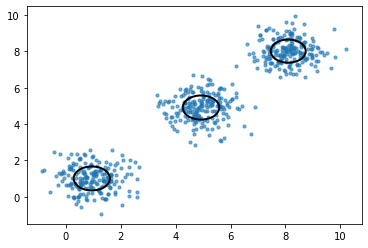

In [ ]:
 fig, ax = plt.subplots()
circle1 = plt.Circle((mean[0][0],mean[0][1]),np.sqrt(sigma[0]),color='black',fill=False,lw=2)
ax.add_patch(circle1)
circle2 = plt.Circle((mean[1][0],mean[1][1]),np.sqrt(sigma[1]),color='black',fill=False,lw=2)
ax.add_patch(circle2)
circle3 = plt.Circle((mean[2][0],mean[2][1]),np.sqrt(sigma[2]),color='black',fill=False,lw=2)
ax.add_patch(circle3)
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)
plt.show()